In [25]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
import matplotlib.pyplot as plt 

In [15]:
h = fetch_california_housing()
X = h.data
y = h.target

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [19]:
model = LinearRegression()
model.fit(X_train_pca,y_train)

LinearRegression()

In [20]:
y_pred = model.predict(X_test_pca)
y_pred

array([1.98818015, 2.05865852, 1.86200464, ..., 2.13948024, 1.98047013,
       2.08534471])

In [30]:
pca.explained_variance_ratio_

array([0.25313826, 0.23403182])

In [31]:
pca.n_components_

2

In [21]:
mse = mean_squared_error(y_test,y_pred)
mse

1.2945562711590004

In [23]:
mae = mean_absolute_error(y_test,y_pred)
mae

0.8905370409887194

In [24]:
r2 = r2_score(y_test,y_pred)
r2

0.01209752630295624

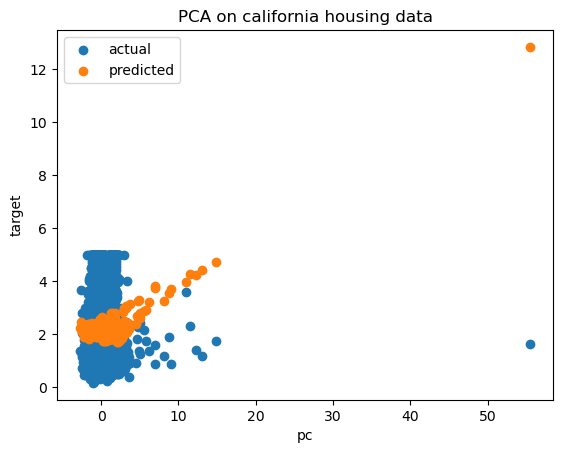

In [29]:
plt.scatter(X_test_pca[:, 0], y_test, label='actual')
plt.scatter(X_test_pca[:, 0], y_pred, label='predicted')
plt.xlabel('pc')
plt.ylabel('target')
plt.title('PCA on california housing data')
plt.legend()
plt.show()